# 03 - Estimation
---

### **Parameter Estimation**
We use data and statistics to help us understand real world phenomena. However, usually it is either impossible or impractical to measure every member of a population. For instance, we cannot practically measure the height of every building in the world. **Estimation** is the process of measuring a sample from a population in order to learn about the the wider population. To continue the example, we cannot practically measure every building, but we can reasonably measure a small sample of buildings and use the measurements to infer information about the whole population of buildings. 

Typically we would make an assumption about the shape of the distribution of the population. This distribution is characterised by parameters which we treat as fixed and unknown. Note that, the idea that the parameters are fixed comes from a school of statistics called **classical** or **frequentist** statistics. However, it is worth noting that there is another school of statistics called **Bayesian** statistics which treats these parameters as unknown random variables. Bayesian statistics is covered separately so, for now, assume we treat the parameters as fixed and unknown. For instance, using our example, we could assume that the distribution of building heights $X$ follows a normal distribution with (fixed) unknown mean and variance $X \sim N(\mu, \sigma^2)$

Our goal is so use estimation to estimate the fixed unknown parameters which describe the distribution of the wider population. 

### **Statistic**
A **statistic** is a function of the sample data. If we use it to estimate an unknown parameter from a distribution it is called an **estimator** although be aware the terms statistic and estimator are often used interchangably. Some examples of statistics are listed below:
- Sample mean: $\bar X = \frac{1}{n}\sum_{i=1}^n x_i$
- Sample variance: $s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar x)^2$
- Sample maximum: $X_{(n)} = \max{X_1, \dots, X_n}$

See the section on bias for more information on why the sample variance is divided by $n-1$ rather than just $n$

A **estimate** is a realisation of an estimator computed using a sample drawn from a population. 

Since statistics involve randomness, they have their own distributions and hence are considered random variables. Note we are still considering the parameters they are used to estimate as fixed, but the statistic used to estimate these fixed parameters is variable. 

More rigourously, an estimator is a function $\hat{\theta} = g(X_1, \dots, X_n)$ of random data.  

### **Consistency & Law of Large Numbers**
Intuitively, we know that collecting more data gives us better estimates. For instance, if you flip a coin 10 times, the proportion of heads could be 70% but if you flip it one million times the proportion will be much closer to 50%. We can formalise this mathematically by saying an estimator $\hat{\theta}_n$ is consistent for a parameter $\theta$ if:

$\hat{\theta}_n \xrightarrow{P} \theta \quad \text{as } n \to \infty$

Equivalently, for every $\varepsilon > 0$,
$P\left(|\hat{\theta}_n - \theta| > \varepsilon\right) \to 0 \quad \text{as } n \to \infty$

The **Law of Large Numbers** states that the sample mean is a consistent estimator of the population mean:
If $X_1, \dots, X_n$ are i.i.d. with mean $\mu$, then $\bar{X}_n \xrightarrow{P} \mu$



### **Bias**
An estimator $\hat \theta$ of the parameter $\theta$ is said to be **unbiased** if $\mathbb{E}(\hat \theta) = \theta$ and **biased** otherwise. 

We can quantify the bias of the estiamtor as $Bias(\hat \theta) = \mathbb{E}(\hat \theta) - \theta$

Note that an unbiased estimator is not necessarily a 'good' estimator. Indeed, a small bias can often reduce variance in predictions. 

### **Maximum Likelihood Estimation (MLE)**
Suppose a random variable is assumed to follow a probability distribution with fixed and unknown parameters. We construct an estimator, draw a sample and use it to build an estimate. But the questions remains, how should we use the estimate to predict the parameters? The answer is that we choose the parameters which make the probability of observing the data most probable. This is known as **Maximum Likelihood Estimation (MLE)**. 

The likelihood is the probability of observing the data given the parameters $\theta$:
$L(\theta) = \prod_{i=1}^n f(x_i \mid \theta)$

We often use the log-likelihood to avoid computational issues with very small values:
$\ell(\theta) = \sum_{i=1}^n \log f(x_i \mid \theta)$

Consider an example where we assume a random variable $X \sim N(\mu, \sigma^2)$ follows a normal distribution with known variance $\sigma^2$ but unkown mean $\mu$. So our goal is to estimate the population mean $\mu$. 

Given a sample $x_1, \dots, x_n$, the likelihood is:

$L(\mu) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)$

Taking logs:

$\ell(\mu) = -\frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - \mu)^2$

To find the MLE, differentiate with respect to $\mu$ and set equal to zero:

$\frac{d\ell}{d\mu} = \frac{1}{\sigma^2}\sum_{i=1}^n (x_i - \mu) = 0$

Solving gives:

$\hat{\mu}_{\text{MLE}} = \bar{X}$

So the MLE estimate of the population mean for a random variable which follows a normal distribution with known variance $\sigma^2$ but unkown mean $\mu$ is the sample mean $\bar{X}$

### **Central Limit Theorem (CLT)**
The **Central Limit Theorem (CLT)** states that the distribution of sample means will tend to be normally distributed, regardless of the shape of the population distribution, as long as the sample size is sufficiently large. 

This example below will demonstrate the CLT by simulating the sampling process from non-normal distributions and showing that the distribution of the sample means approaches a normal distribution as the sample size increases

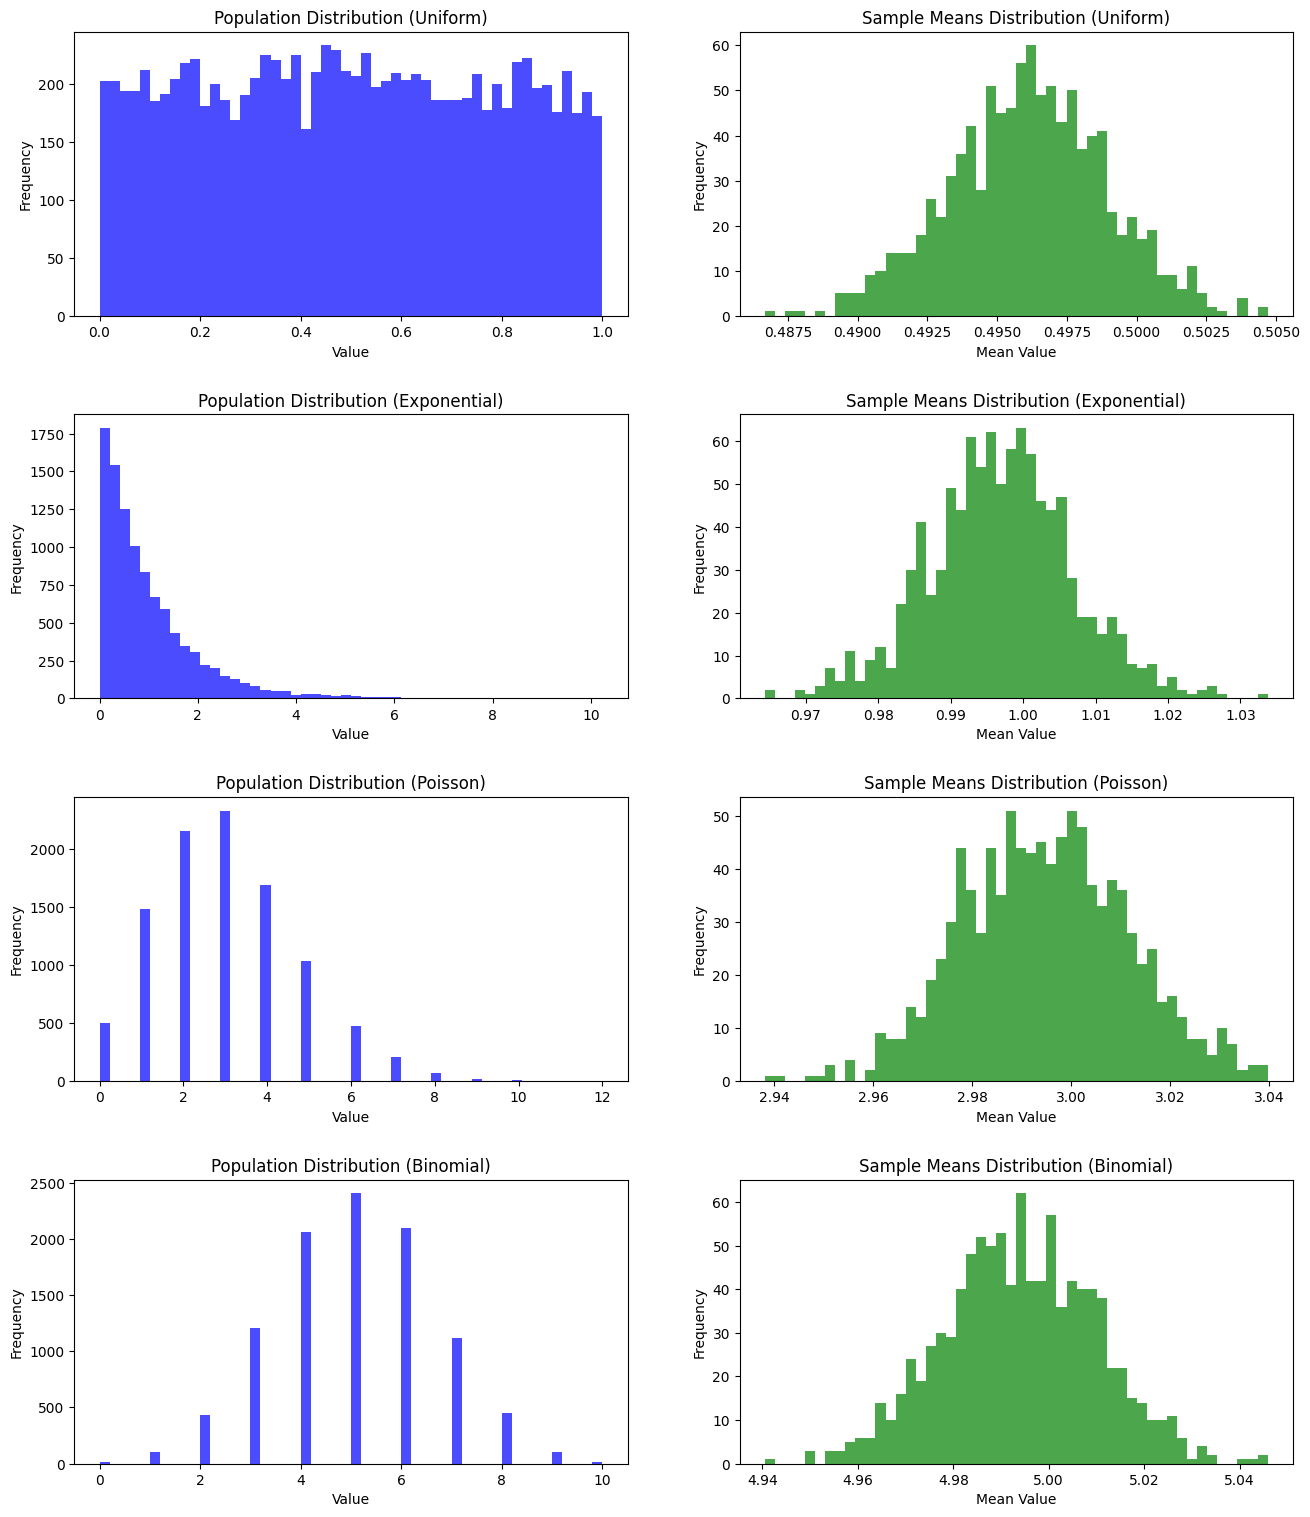

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Central Limit Theorem demonstration with different distributions

# Parameters
population_size = 10000  # size of the population
sample_size = 10000  # size of each sample
num_samples = 1000  # number of samples

# Generate populations with different distributions
distributions = {
    "Uniform": np.random.uniform(low=0, high=1, size=population_size),
    "Exponential": np.random.exponential(scale=1.0, size=population_size),
    "Poisson": np.random.poisson(lam=3.0, size=population_size),
    "Binomial": np.random.binomial(n=10, p=0.5, size=population_size),
}

# Plot settings
fig, axes = plt.subplots(nrows=len(distributions), ncols=2, figsize=(14, 4 * len(distributions)))
fig.tight_layout(pad=5.0)

# Loop over each distribution and calculate sample means
for i, (dist_name, population) in enumerate(distributions.items()):
    # Collect sample means
    sample_means = [np.mean(np.random.choice(population, size=sample_size, replace=True)) for _ in range(num_samples)]

    # Plot the population distribution
    axes[i, 0].hist(population, bins=50, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Population Distribution ({dist_name})')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Plot the sample means distribution
    axes[i, 1].hist(sample_means, bins=50, color='green', alpha=0.7)
    axes[i, 1].set_title(f'Sample Means Distribution ({dist_name})')
    axes[i, 1].set_xlabel('Mean Value')
    axes[i, 1].set_ylabel('Frequency')

# Show fig
plt.show()
